In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Zad.
Wczytaj dane i narysuj je na wykresie.

In [2]:
data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East_Midlands 4.89 3.34
West_Midlands 5.63 3.47
East_Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern_Ireland 4.02 4.56'''
from io import StringIO
df = pd.read_csv(StringIO(data_str), sep=r'\s+')

X_train =  np.vstack(df.Tobacco)
y_train = np.vstack(df.Alcohol)




In [3]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, "bo")
plt.show()
print(X_train.shape)

<Figure size 640x480 with 1 Axes>

(11, 1)


# Zad 
Wykonaj regresię za pomocą Scikit-Learn.

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[4.35116849]
 [0.30193836]]


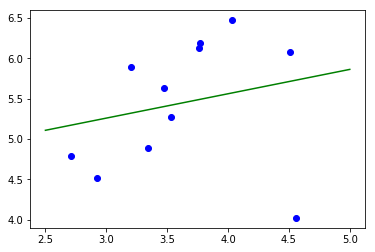

In [5]:
f_lr = lambda x: lin_reg.coef_[0][0] * x +lin_reg.intercept_[0]

x_f_lr = np.linspace(2.5, 5, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Zad.
Proszę narysować wykres zmiany funkcji kosztu w przypadku:
  * Gradient Descent
  * Momentum

In [7]:
data_plus_bias  = np.c_[np.ones((X_train.shape[0], 1)), X_train]
data_m, data_n = data_plus_bias.shape
print(data_m, data_n)

11 2


In [8]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

error_array_g_b=[]
error_array_m_b=[]

batch_error_array_g=[]
batch_error_array_m=[]

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 64

n_batches = int(np.ceil(data_m / batch_size))

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   
        
        batch_error_array_g.append( sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )
        error_array_g_b.append( sess.run( mse, feed_dict={X: data_plus_bias, y: y_train}) )            
    
    best_theta_g = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final_g.ckpt")
    
print("Best theta:")
print(best_theta_g)

Epoch 0 MSE = 5.90421
Epoch 100 MSE = 0.57923687
Epoch 200 MSE = 0.7844822
Epoch 300 MSE = 0.6125314
Epoch 400 MSE = 0.5581452
Epoch 500 MSE = 0.6469549
Epoch 600 MSE = 0.6220324
Epoch 700 MSE = 0.56872416
Epoch 800 MSE = 0.746707
Epoch 900 MSE = 0.5702867
Best theta:
[[2.283169 ]
 [0.8564258]]


In [9]:
tf.reset_default_graph()

n_epochs = 2000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 64

n_batches = int(np.ceil(data_m / batch_size))

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   
        
        batch_error_array_m.append( sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )
        error_array_m_b.append( sess.run( mse, feed_dict={X: data_plus_bias, y: y_train}) )            
    
    best_theta_m = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final_m.ckpt")
    
print("Best theta:")
print(best_theta_m)

Epoch 0 MSE = 5.90421
Epoch 100 MSE = 0.5684159
Epoch 200 MSE = 0.6026674
Epoch 300 MSE = 0.5266076
Epoch 400 MSE = 0.46494687
Epoch 500 MSE = 0.49987543
Epoch 600 MSE = 0.49797657
Epoch 700 MSE = 0.4399765
Epoch 800 MSE = 0.664523
Epoch 900 MSE = 0.45663422
Best theta:
[[4.317688  ]
 [0.22942916]]


In [ ]:
plt.figure()
plt.semilogy(error_array_g_b, label='Batch Gradient Descent')
plt.semilogy(error_array_m_b, label='Batch Momentum')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.semilogy(batch_error_array_g, label='Gradient Descent')
plt.semilogy(batch_error_array_m, label='Momentum')
plt.xlabel('Epoch')
plt.ylabel('Batch MSE')
plt.legend()
plt.show()

In [ ]:
f_lr_g = lambda x: best_theta_g[1] * x + best_theta_g[0]
f_lr_m = lambda x: best_theta_m[1] * x + best_theta_m[0]

x_f_lr = np.linspace(2.5, 5, 200)
y_f_lr_g = f_lr_g(x_f_lr)
y_f_lr_m = f_lr_m(x_f_lr)
plt.plot(x_f_lr, y_f_lr_g, 'g');
plt.plot(x_f_lr, y_f_lr_m, 'r');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Zad

Proszę zmienić funkcję kosztu na
$$
MSE(X;\theta) = \frac{1}{m} \sum | \theta^T x_i - y_i  |.
$$


In [ ]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

error_array_g_b=[]
error_array_m_b=[]

batch_error_array_g=[]
batch_error_array_m=[]

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.abs(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 64

n_batches = int(np.ceil(data_m / batch_size))

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   
        
        batch_error_array_g.append( sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )
        error_array_g_b.append( sess.run( mse, feed_dict={X: data_plus_bias, y: y_train}) )            
    
    best_theta_g = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final_g.ckpt")
    
print("Best theta:")
print(best_theta_g)

In [ ]:
tf.reset_default_graph()

n_epochs = 2000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.abs(error), name="mse")
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 64

n_batches = int(np.ceil(data_m / batch_size))

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   
        
        batch_error_array_m.append( sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )
        error_array_m_b.append( sess.run( mse, feed_dict={X: data_plus_bias, y: y_train}) )            
    
    best_theta_m = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final_m.ckpt")
    
print("Best theta:")
print(best_theta_m)

In [ ]:
plt.figure()
plt.semilogy(error_array_g_b, label='Batch Gradient Descent')
plt.semilogy(error_array_m_b, label='Batch Momentum')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.semilogy(batch_error_array_g, label='Gradient Descent')
plt.semilogy(batch_error_array_m, label='Momentum')
plt.xlabel('Epoch')
plt.ylabel('Batch MSE')
plt.legend()
plt.show()

In [ ]:
f_lr_g = lambda x: best_theta_g[1] * x + best_theta_g[0]
f_lr_m = lambda x: best_theta_m[1] * x + best_theta_m[0]

x_f_lr = np.linspace(2.5, 5, 200)
y_f_lr_g = f_lr_g(x_f_lr)
y_f_lr_m = f_lr_m(x_f_lr)
plt.plot(x_f_lr, y_f_lr_g, 'g');
plt.plot(x_f_lr, y_f_lr_m, 'r');
plt.plot(X_train, y_train, 'bo');
plt.show()